In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Model, Sequential
from keras.layers import Activation, Dense, BatchNormalization, Dropout, Conv2D, concatenate, Conv2DTranspose, MaxPooling2D, UpSampling2D, Input, Reshape
from keras import backend as K
#from keras.layers.core import SpatialDropout2D
from tensorflow.keras.layers import SpatialDropout2D
from keras.optimizers import Adam, SGD
import tensorflow as tf
import numpy as np
import pandas as pd
import glob
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

from sklearn.model_selection import train_test_split
from warnings import filterwarnings

filterwarnings('ignore')
plt.rcParams["axes.grid"] = False
#seed = 42  # Define seed as a variable and set it as the random seed
#np.random.seed(seed)  # Set the random seed
import tensorflow as tf
import os
import numpy as np
from sklearn.model_selection import train_test_split

from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

seed = 42
np.random.seed = seed

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

# Update the path to your dataset root directory
ROOT_PATH = '/content/drive/MyDrive/'

# List of subfolder names containing images
image_subfolders = ['lessimage'
                    ]

# List of corresponding subfolders containing masks
mask_subfolders = ['lessmask'

                   ]

X_data = []
Y_data = []

for image_subfolder, mask_subfolder in zip(image_subfolders, mask_subfolders):
    IMAGE_PATH = os.path.join(ROOT_PATH, image_subfolder)
    MASK_PATH = os.path.join(ROOT_PATH, mask_subfolder)

    # Get a list of image file names from the current image subfolder
    image_files = [file for file in os.listdir(IMAGE_PATH) if file.endswith('.jpg')]  # Update the file extension if needed

    for n, image_file in tqdm(enumerate(image_files), total=len(image_files)):
        img = imread(os.path.join(IMAGE_PATH, image_file))[:, :, :IMG_CHANNELS]
        img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
        X_data.append(img)

        mask_file = f'mask_{image_file}'
        mask = imread(os.path.join(MASK_PATH, mask_file))
        mask = np.expand_dims(resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True), axis=-1)
        Y_data.append(mask )

X_data = np.array(X_data, dtype=np.uint8)
Y_data = np.array(Y_data, dtype=np.bool)

100%|██████████| 3390/3390 [01:46<00:00, 31.81it/s]


In [ ]:
import os
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

best=load_model('/content/drive/MyDrive/allcustomdatasetmodels_ensemble.h5')
import os
import tensorflow as tf
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [ ]:
kf = KFold(n_splits=5, shuffle=True)  # 5-fold cross-validation



In [ ]:
from sklearn.metrics import f1_score, precision_score

accuracies = []
accuracies2 = []
f1_scores = []
precisions = []

for train_index, test_index in kf.split(X_data):
    X_train, X_test = X_data[train_index], X_data[test_index]
    y_train, y_test = Y_data[train_index], Y_data[test_index]

    # Train the model on the current fold
    best.fit(X_train, y_train, epochs=7, batch_size=16, validation_data=(X_test, y_test))

    # Evaluate on the test fold
    y_pred = best.predict(X_test)

    # Compute accuracy
    accuracy = np.mean(np.equal(y_test, np.round(y_pred)))
    accuracies.append(accuracy)

    # Threshold the predicted probabilities to get binary masks
    prediction_binary = (y_pred > 0.5).astype(np.uint8)
    Y_val_binary = (y_test > 0.5).astype(np.uint8)

    from sklearn.metrics import accuracy_score
    accuracy2=accuracy_score(Y_val_binary.flatten(), prediction_binary.flatten())
    accuracies2.append(accuracy2)

    # Calculate F1 score
    f1score = f1_score(Y_val_binary.flatten(), prediction_binary.flatten())
    f1_scores.append(f1score)

    # Calculate precision
    precision = precision_score(Y_val_binary.flatten(), prediction_binary.flatten())
    precisions.append(precision)

Epoch 1/7
170/170 [==============================] - 59s 223ms/step - loss: 0.1140 - accuracy: 0.9417 - val_loss: 0.1057 - val_accuracy: 0.9450
Epoch 2/7
170/170 [==============================] - 32s 185ms/step - loss: 0.1166 - accuracy: 0.9410 - val_loss: 0.1067 - val_accuracy: 0.9447
Epoch 3/7
170/170 [==============================] - 32s 190ms/step - loss: 0.1144 - accuracy: 0.9415 - val_loss: 0.1063 - val_accuracy: 0.9450
Epoch 4/7
170/170 [==============================] - 34s 198ms/step - loss: 0.1136 - accuracy: 0.9418 - val_loss: 0.1053 - val_accuracy: 0.9452
Epoch 5/7
170/170 [==============================] - 33s 196ms/step - loss: 0.1144 - accuracy: 0.9415 - val_loss: 0.1061 - val_accuracy: 0.9451
Epoch 6/7
170/170 [==============================] - 32s 191ms/step - loss: 0.1127 - accuracy: 0.9420 - val_loss: 0.1054 - val_accuracy: 0.9451
Epoch 7/7
22/22 [==============================] - 6s 59ms/step
Epoch 1/7
170/170 [==============================] - 34s 199ms/step - lo

In [ ]:
print("Accuracies:", accuracies)

print(f"Mean Accuracy: {np.mean(accuracies)}")
print("Accuracies2:", accuracies2)
print(f"Mean Accuracy: {np.mean(accuracies2)}")
print("F1 score:", f1_scores)
print(f"Mean F1 Score: {np.mean(f1_scores)}")
print("Precisions:", precisions)
print(f"Mean Precision: {np.mean(precisions)}")

Accuracies: [0.9450808724822548, 0.9408669485806715, 0.9463638710764657, 0.9433852564268759, 0.9440963430038948]
Mean Accuracy: 0.9439586583140326
Accuracies2: [0.9450808724822548, 0.9408669485806715, 0.9463638710764657, 0.9433852564268759, 0.9440963430038948]
Mean Accuracy: 0.9439586583140326
F1 score: [0.9148907644995767, 0.9147588392735803, 0.9208724615623667, 0.9216732378357606, 0.9196020869880439]
Mean F1 Score: 0.9183594780318657
Precisions: [0.9522389665620129, 0.9535469051369115, 0.9570440500622279, 0.9622522151878983, 0.9595459731653327]
Mean Precision: 0.9569256220228766


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 37ms/step


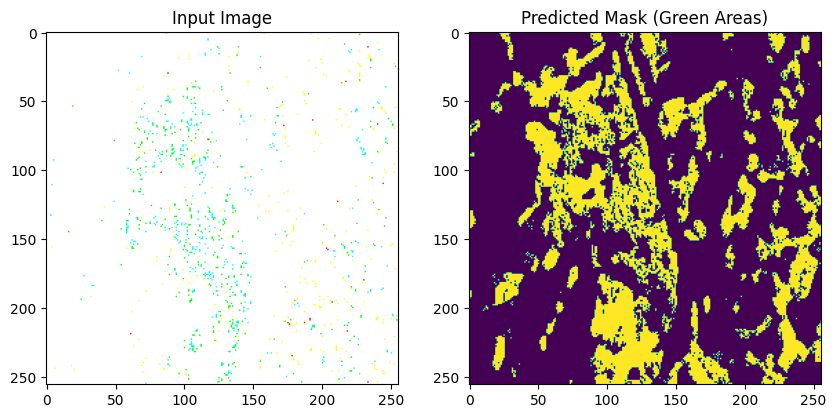

In [ ]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the trained model

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3
# Load the input image from your Google Drive
#input_image_path = '/content/drive/MyDrive/images/3484_sat_61.jpg'  # Replace with your input image's file path
input_image_path = '/content/drive/MyDrive/Sowmik Dataset/Planned_way/Park all processed data/Preprocessed park/Geleb park-2005.jpg'  # Replace with your input image's file path
input_image = imread(input_image_path)[:, :, :3]  # Assuming 3 channels (RGB)
input_image = resize(input_image, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)

#input_image = input_image / 255.0  # Normalize the image

# Reshape the input image for prediction
input_image = np.expand_dims(input_image, axis=0)

# Predict green areas in the input image
predictions = best.predict(input_image)

# Threshold the predictions to obtain binary masks
#predicted_mask = (predictions > 0.8).astype(np.uint8)
predicted_mask = (predictions > 0.5).astype(np.uint8)

# Display the input image and the predicted mask (green areas)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_image[0])
plt.title("Input Image")

plt.subplot(1, 2, 2)
plt.imshow(resize(predicted_mask[0, ..., 0], (input_image.shape[1], input_image.shape[2]), mode='constant'), cmap='viridis')
plt.title("Predicted Mask (Green Areas)")
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 27ms/step


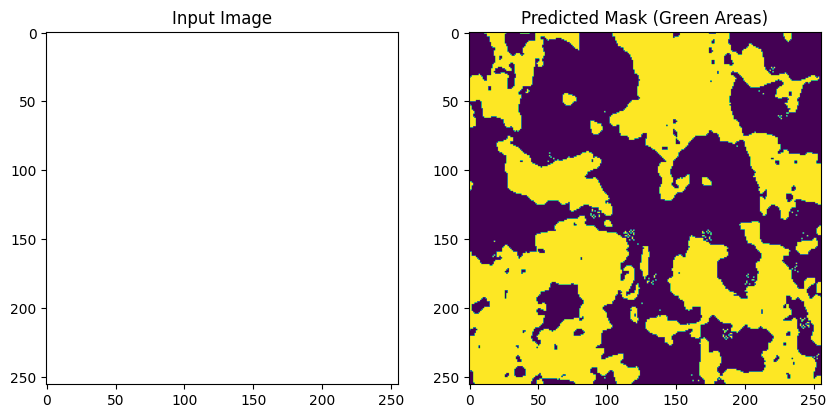

In [ ]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the trained model

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3
# Load the input image from your Google Drive
input_image_path = '/content/drive/MyDrive/images/3484_sat_61.jpg'  # Replace with your input image's file path
#input_image_path = '/content/drive/MyDrive/Sowmik Dataset/Planned_way/Park all processed data/Preprocessed park/Geleb park-2005.jpg'  # Replace with your input image's file path
input_image = imread(input_image_path)[:, :, :3]  # Assuming 3 channels (RGB)
input_image = resize(input_image, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)

#input_image = input_image / 255.0  # Normalize the image

# Reshape the input image for prediction
input_image = np.expand_dims(input_image, axis=0)

# Predict green areas in the input image
predictions = best.predict(input_image)

# Threshold the predictions to obtain binary masks
#predicted_mask = (predictions > 0.8).astype(np.uint8)
predicted_mask = (predictions > 0.5).astype(np.uint8)

# Display the input image and the predicted mask (green areas)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_image[0])
plt.title("Input Image")

plt.subplot(1, 2, 2)
plt.imshow(resize(predicted_mask[0, ..., 0], (input_image.shape[1], input_image.shape[2]), mode='constant'), cmap='viridis')
plt.title("Predicted Mask (Green Areas)")
plt.show()
